In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.ensemble import RandomForestRegressor

from keras import models
from keras import layers
from keras import optimizers

In [27]:
import pandas as pd
import numpy as np
import random
#from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from collections import defaultdict
from pprint import pprint
from time import time

from matplotlib import cm
from scipy.stats import describe, kurtosis
from sklearn.decomposition import FastICA, PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import adjusted_mutual_info_score as ami
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples, silhouette_score, f1_score, homogeneity_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection
from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.legend_handler import HandlerLine2D
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from datetime import datetime
from sklearn.model_selection import train_test_split
%matplotlib inline

In [28]:
df = pd.read_csv('Data/train.csv')
print(df.shape)
df.head()

(75757, 64)


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [29]:
## Drop all rows with Null
df_dropna = df.dropna()
print (df_dropna.shape)

(11309, 64)


In [30]:
df_dropna.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [17]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11309 entries, 404 to 73148
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                11309 non-null  int64  
 1   State_Factor               11309 non-null  object 
 2   building_class             11309 non-null  object 
 3   facility_type              11309 non-null  object 
 4   floor_area                 11309 non-null  float64
 5   year_built                 11309 non-null  float64
 6   energy_star_rating         11309 non-null  float64
 7   ELEVATION                  11309 non-null  float64
 8   january_min_temp           11309 non-null  int64  
 9   january_avg_temp           11309 non-null  float64
 10  january_max_temp           11309 non-null  int64  
 11  february_min_temp          11309 non-null  int64  
 12  february_avg_temp          11309 non-null  float64
 13  february_max_temp          11309 non-null  i

In [32]:
## Labelencoder for categorical attributes
from sklearn.preprocessing import LabelEncoder

def labelencoder_conversion(df, column_in, column_out):
    encode_column = df[column_in]
    encode_df = pd.DataFrame(encode_column, columns=[column_in])
    print (encode_df)
    # creating instance of labelencoder
    labelencoder = LabelEncoder()
    # Assigning numberical values and storing in another column
    encode_df[column_out] = labelencoder.fit_transform(encode_df[column_in])

    return encode_df

In [61]:
## apply labelencoder on facility_type
facility_encode = labelencoder_conversion(df, 'facility_type', 'Facility_Label')
facility_encode

                                   facility_type
0                   Grocery_store_or_food_market
1      Warehouse_Distribution_or_Shipping_center
2                           Retail_Enclosed_mall
3                      Education_Other_classroom
4                      Warehouse_Nonrefrigerated
...                                          ...
75752                       Office_Uncategorized
75753                        5plus_Unit_Building
75754                           Commercial_Other
75755                           Commercial_Other
75756                         2to4_Unit_Building

[75757 rows x 1 columns]


,facility_type,Facility_Label
0,Grocery_store_or_food_market,13
1,Warehouse_Distribution_or_Shipping_center,55
2,Retail_Enclosed_mall,48
3,Education_Other_classroom,6
4,Warehouse_Nonrefrigerated,56
...,...,...
75752,Office_Uncategorized,32
75753,5plus_Unit_Building,1
75754,Commercial_Other,2
75755,Commercial_Other,2


In [70]:
## apply labelencoder on State Factor 
state_label = labelencoder_conversion(df, 'State_Factor', 'State_Label')
state_label.value_counts()
   

      State_Factor
0          State_1
1          State_1
2          State_1
3          State_1
4          State_1
...            ...
75752     State_11
75753     State_11
75754     State_11
75755     State_11
75756     State_11

[75757 rows x 1 columns]


State_Factor  State_Label
State_6       5              50840
State_11      2               6412
State_1       0               5618
State_2       3               4871
State_4       4               4300
State_8       6               3701
State_10      1                 15
dtype: int64

'1.0.2'

In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
def onehotencoder_conversion(df, encode_in='building_class'):
    encode_types = df[encode_in]
    #print (bridge_types)
    encode_df = pd.DataFrame(encode_types, columns=[encode_in])
    # converting type of columns to 'category'
    encode_df[encode_in] = encode_df[encode_in].astype('category')
    encode_df['building_class_Cat'] = encode_df[encode_in].cat.codes
    print (encode_df['building_class_Cat'])
    # creating instance of one-hot-encoder
    enc = OneHotEncoder(handle_unknown='ignore')
    # passing bridge-types-cat column (label encoded values of bridge_types)
    enc_df = pd.DataFrame(enc.fit_transform(encode_df[['building_class_Cat']]).toarray())
    print (enc_df)
    # merge with main df bridge_df on key values
    encode_df_join = encode_df.join(enc_df)
    print (encode_df_join)
    return encode_df_join

In [88]:
## convert categorical data 'building_class' using 'OnehotEncoder' 
building_onehot = onehotencoder_conversion(df,encode_in='building_class')
building_onehot


0        0
1        0
2        0
3        0
4        0
        ..
75752    0
75753    1
75754    0
75755    0
75756    1
Name: building_class_Cat, Length: 75757, dtype: int8
         0    1
0      1.0  0.0
1      1.0  0.0
2      1.0  0.0
3      1.0  0.0
4      1.0  0.0
...    ...  ...
75752  1.0  0.0
75753  0.0  1.0
75754  1.0  0.0
75755  1.0  0.0
75756  0.0  1.0

[75757 rows x 2 columns]
      building_class  building_class_Cat    0    1
0         Commercial                   0  1.0  0.0
1         Commercial                   0  1.0  0.0
2         Commercial                   0  1.0  0.0
3         Commercial                   0  1.0  0.0
4         Commercial                   0  1.0  0.0
...              ...                 ...  ...  ...
75752     Commercial                   0  1.0  0.0
75753    Residential                   1  0.0  1.0
75754     Commercial                   0  1.0  0.0
75755     Commercial                   0  1.0  0.0
75756    Residential                   1  0.0  

,building_class,building_class_Cat,0,1
0,Commercial,0,1.0,0.0
1,Commercial,0,1.0,0.0
2,Commercial,0,1.0,0.0
3,Commercial,0,1.0,0.0
4,Commercial,0,1.0,0.0
...,...,...,...,...
75752,Commercial,0,1.0,0.0
75753,Residential,1,0.0,1.0
75754,Commercial,0,1.0,0.0
75755,Commercial,0,1.0,0.0


In [65]:
state_onehot = onehotencoder_conversion(df, 'State_Factor')
state_onehot

0        0
1        0
2        0
3        0
4        0
        ..
75752    2
75753    2
75754    2
75755    2
75756    2
Name: building_class_Cat, Length: 75757, dtype: int8
         0    1    2    3    4    5    6
0      1.0  0.0  0.0  0.0  0.0  0.0  0.0
1      1.0  0.0  0.0  0.0  0.0  0.0  0.0
2      1.0  0.0  0.0  0.0  0.0  0.0  0.0
3      1.0  0.0  0.0  0.0  0.0  0.0  0.0
4      1.0  0.0  0.0  0.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...  ...
75752  0.0  0.0  1.0  0.0  0.0  0.0  0.0
75753  0.0  0.0  1.0  0.0  0.0  0.0  0.0
75754  0.0  0.0  1.0  0.0  0.0  0.0  0.0
75755  0.0  0.0  1.0  0.0  0.0  0.0  0.0
75756  0.0  0.0  1.0  0.0  0.0  0.0  0.0

[75757 rows x 7 columns]
      State_Factor  building_class_Cat    0    1    2    3    4    5    6
0          State_1                   0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
1          State_1                   0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
2          State_1                   0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
3          S

,State_Factor,building_class_Cat,0,1,2,3,4,5,6
0,State_1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,State_1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,State_1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,State_1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,State_1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
75752,State_11,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75753,State_11,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75754,State_11,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75755,State_11,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
import ManipulateCategory as mc

state_label = mc.labelencoder_conversion(df, 'State_Factor', 'Label_test')
print (state_label)

state_onehot = mc.onehotencoder_conversion(df, 'State_Factor')
print (state_onehot)

      State_Factor  Label_test
0          State_1           0
1          State_1           0
2          State_1           0
3          State_1           0
4          State_1           0
...            ...         ...
75752     State_11           2
75753     State_11           2
75754     State_11           2
75755     State_11           2
75756     State_11           2

[75757 rows x 2 columns]
      State_Factor  building_class_Cat    0    1    2    3    4    5    6
0          State_1                   0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
1          State_1                   0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
2          State_1                   0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
3          State_1                   0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
4          State_1                   0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
...            ...                 ...  ...  ...  ...  ...  ...  ...  ...
75752     State_11                   2  0.0  0.0  1.0  0.0  0.0  0.0  0.0
75753     

In [99]:
## drop preprocessing categorical data 
facility_join = facility_encode.drop(['facility_type'], axis=1)
state_label_join = state_label.drop(['State_Factor'], axis=1)
building_onehot_join = building_onehot.drop(['building_class', 'building_class_Cat'], axis=1)

building_onehot_join.columns = ['Commercial', 'Residential']

## join preprocessing categorical data into df
df_join = df.join(facility_join).join(state_label_join).join(building_onehot_join)

## dropped preproceed categorical columns -- State_Factor, building_class, facility_type
df_join_dropcol=df_join.drop(['building_class', 'State_Factor', 'facility_type'], axis=1)
df_join_dropcol.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,Facility_Label,State_Label,Commercial,Residential
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,...,1.0,1.0,1.0,NaN,248.682615,0,13,0,1.0,0.0
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,...,1.0,NaN,1.0,12.0,26.500150,1,55,0,1.0,0.0
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,...,1.0,NaN,1.0,12.0,24.693619,2,48,0,1.0,0.0
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,...,1.0,NaN,1.0,12.0,48.406926,3,6,0,1.0,0.0
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,...,1.0,1.0,1.0,NaN,3.899395,4,56,0,1.0,0.0


In [102]:
## drop rows with NaN
df_dropna = df_join_dropcol.dropna()
df_dropna.shape

(11309, 65)

## Prepare data_X and data_y

In [104]:
## prepare data_X and data_y
data_X = df_dropna.drop(['site_eui', 'id'], axis = 1)
print (data_X.shape)
data_y = df_dropna['site_eui']
print (data_y.shape)

(11309, 63)
(11309,)


In [105]:
## Scaled features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler.fit(data_feature)     #train 712
scaler.fit(data_X)
scaled_data_X = scaler.transform(data_X)

In [107]:
# Method 2: split train - test set
# (1) train_all, test (80/20)
X_train, X_test, y_train, y_test =  train_test_split(scaled_data_X ,data_y, test_size=0.2, random_state=42)
scaled_feature = X_train
data_y = y_train

In [116]:
## dimensional reduction1: use Random forest to find the importan features
n_estimates = list(np.arange(5,100,5))
regr = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
#rfc = RFC(n_estimators=100,min_samples_leaf=(int(len(scaled_feature)*.01)),random_state=0)
regr.fit(scaled_feature, data_y)
feature_imp = regr.feature_importances_
feature_imp

array([1.20042117e-02, 4.77990444e-02, 3.81051821e-02, 5.81926104e-01,
       2.70296837e-03, 5.69082300e-04, 1.15079793e-03, 3.15103969e-03,
       1.34328980e-03, 8.65032486e-04, 1.44428366e-03, 1.30931078e-03,
       1.74480088e-03, 6.38908681e-04, 9.98645137e-04, 7.72473657e-05,
       1.88106545e-03, 5.37995393e-03, 3.88325463e-03, 3.28827104e-03,
       2.15380015e-03, 2.29252928e-03, 5.00286547e-04, 1.06582463e-02,
       3.27576099e-03, 1.15093871e-02, 2.55811358e-04, 3.35152609e-03,
       3.63836648e-04, 1.74228270e-04, 1.68003489e-03, 1.81318698e-03,
       6.04817679e-04, 1.77820901e-03, 7.40146222e-04, 1.25661014e-03,
       7.79132605e-03, 2.32030478e-03, 2.60787082e-05, 8.66684944e-04,
       1.22897028e-03, 2.47177871e-03, 1.20292977e-03, 1.55372050e-02,
       9.94900469e-04, 1.23047256e-04, 2.39613888e-03, 3.40243962e-03,
       3.46705941e-04, 1.27164383e-03, 6.26339062e-04, 2.74284724e-03,
       1.01673777e-03, 1.72549029e-03, 0.00000000e+00, 1.70121776e-03,
      

<AxesSubplot:title={'center':'Sorted'}>

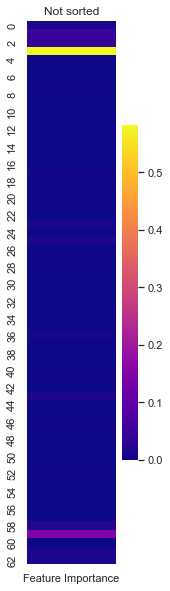

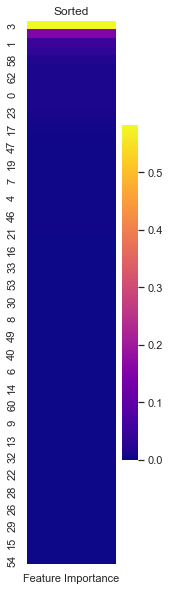

In [114]:
df_imp = pd.DataFrame(feature_imp,columns=['Feature Importance'], index = headers[:-1])
plt.figure(figsize=(2,10))
plt.title("Not sorted")
sns.heatmap(df_imp,cmap='plasma',)

df_imp.sort_values(by=['Feature Importance'],inplace=True,ascending=False)
plt.figure(figsize=(2,10))
plt.title("Sorted")
sns.heatmap(df_imp,cmap='plasma',)

In [ ]:
# plot cumulative sum curve vs sorted feature importance
df_imp['Cum Sum'] = df_imp['Feature Importance'].cumsum()
df_imp['Cum Sum']
#ax.axvline("0.95", color="red", linestyle="--")
plt.figure(figsize=(15,10))
plt.bar(list(df_imp.index), np.array(df_imp['Feature Importance']), 
        align='center', alpha=0.5, label='Feature Importance')
plt.step(list(df_imp.index), np.array(df_imp['Cum Sum']), 
        where='mid', label='Cum Sum')
plt.axhline(y = 0.95, color="red", linestyle="--",label='95% threshold')
plt.title('Feature Importances of Data1')
plt.show()


In [ ]:
#drop features after 95% treshold (drop 15 features here)
drop_list = list(df_imp.index)[26:]
print (drop_list)
df_scaled_feature = pd.DataFrame(data=scaled_feature, columns = headers[:-1])
feature_transform_rfc = df_scaled_feature.drop(drop_list, axis=1)
feature_transform_rfc.head()
data_transform_rfc = feature_transform_rfc.to_numpy()
data_transform_rfc.shape